In [1]:
# !pip3 install medpy -i https://pypi.tuna.tsinghua.edu.cn/simple
# !pip3 install nibabel -i https://pypi.tuna.tsinghua.edu.cn/simple
# !pip3 install pynrrd -i https://pypi.tuna.tsinghua.edu.cn/simple

# pip3 install torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchaudio==0.8.0 -i https://pypi.tuna.tsinghua.edu.cn/simple

In [2]:
# cd dataloaders
# 执行:CTM_data_processing-sitk.ipynb
# 备注:和UA-MT以及VNet共用一个数据预处理程序,若已经运行过,则不必要在重复运行

In [3]:
# !cd ../code
# !python3 train_VNet_CTM.py --batch_size 4 --gpu "3"  #,5,6,7"

In [4]:
# !python3 test_VNet_CTM.py --gpu '3'

## 后处理

## dice/jc/hd/asd的violin图\箱图

Unnamed: 0_level_0      dice                            jc            \
  Unnamed: 0_level_1        bg      dura        SC        bg      dura   
0            1006763  0.994975  0.945043  0.836639  0.990000  0.895812   
1            B785777  0.993659  0.923544  0.913070  0.987398  0.857949   
2             805736  0.996066  0.927090  0.918993  0.992162  0.864090   
3            B644731  0.993510  0.882056  0.894755  0.987104  0.788998   
4           B1227957  0.993775  0.906334  0.889428  0.987628  0.828712   

                   hd                           asd                      
         SC        bg      dura        SC        bg      dura        SC  
0  0.719157  1.000000  2.236068  2.236068  0.105590  0.501425  0.967721  
1  0.840045  1.414214  4.358899  1.414214  0.112186  0.480204  0.407444  
2  0.850127  1.000000  1.732051  1.414214  0.119308  0.718574  0.523208  
3  0.809554  1.000000  4.242641  1.414214  0.255504  1.330030  0.570767  
4  0.800874  1.000000  2.236068  2.236068  0.142333  0.597466  0.193819

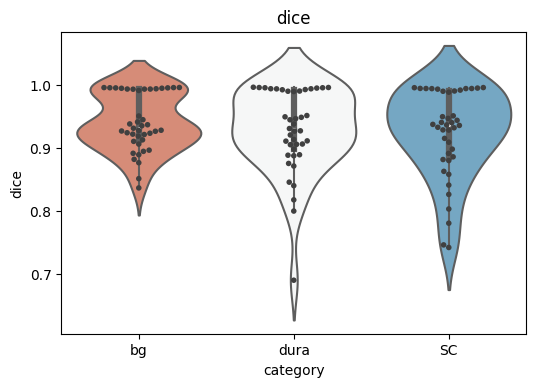

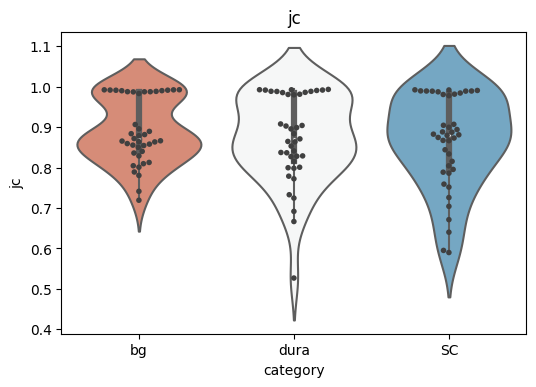

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


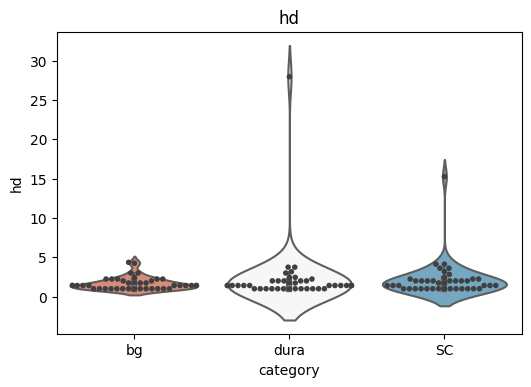

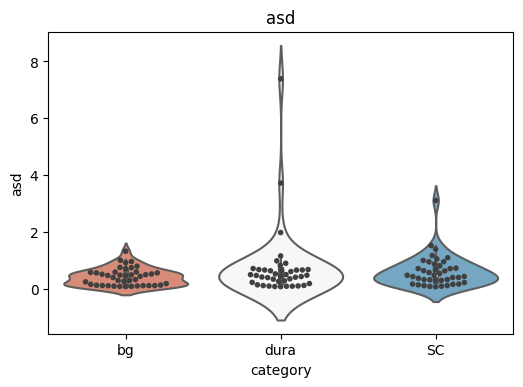

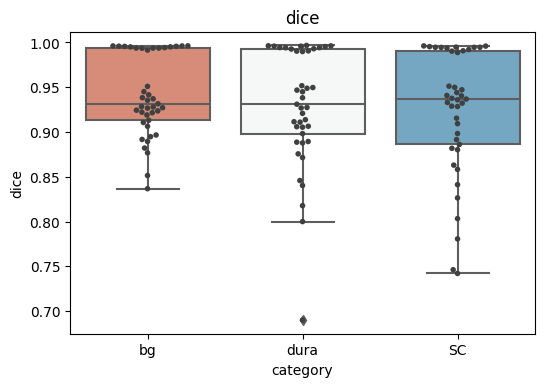

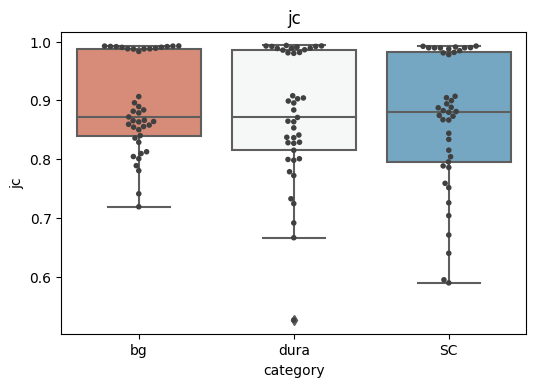

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


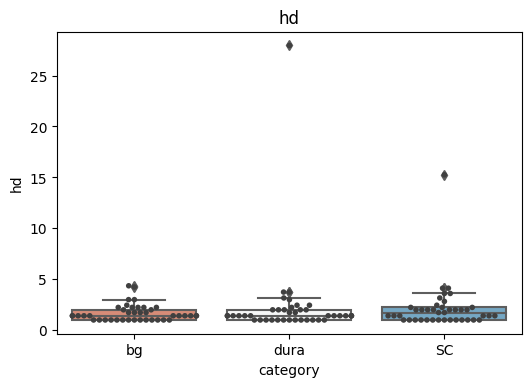

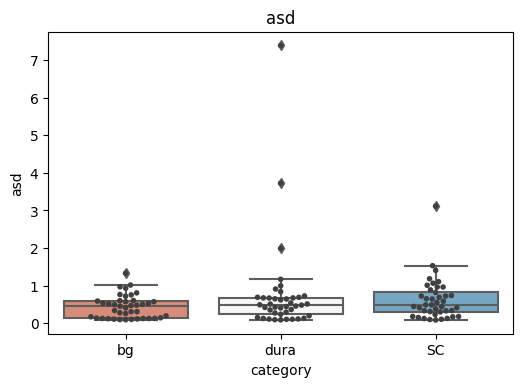

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from post_utils import get_proc_df, get_voilinplot, get_boxplot, get_images, imshow


name_classes = ['bg','dura','SC']
results_dir = "../model/prediction/VNet_CTM_post"
filename = "../model/prediction/VNet_CTM_post/metrics_test_set.csv"
results_raw = pd.read_csv(filename,header=[0,1])
display(results_raw.head())

# 删除异常样本
results_raw = results_raw.drop(results_raw[results_raw[('dice','SC')]<0.65].index)


# violinplot:
filename = os.path.join(results_dir,'voilinplot of pred dice on test-set.png')
proc_df = get_proc_df(results_raw,metric='dice',name_classes=name_classes)
get_voilinplot(proc_df,'dice',name_classes,filename)

filename = os.path.join(results_dir,'voilinplot of pred jc on test-set.png')
proc_df = get_proc_df(results_raw,metric='jc',name_classes=name_classes)
get_voilinplot(proc_df,'jc',name_classes,filename)

filename = os.path.join(results_dir,'voilinplot of pred hd on test-set.png')
proc_df = get_proc_df(results_raw,metric='hd',name_classes=name_classes)
get_voilinplot(proc_df,'hd',name_classes,filename)

filename = os.path.join(results_dir,'voilinplot of pred asd on test-set.png')
proc_df = get_proc_df(results_raw,metric='asd',name_classes=name_classes)
get_voilinplot(proc_df,'asd',name_classes,filename)


# boxplot:
filename = os.path.join(results_dir,'voilinplot of pred dice on test-set.png')
proc_df = get_proc_df(results_raw,metric='dice',name_classes=name_classes)
get_boxplot(proc_df,'dice',name_classes,filename)

filename = os.path.join(results_dir,'voilinplot of pred jc on test-set.png')
proc_df = get_proc_df(results_raw,metric='jc',name_classes=name_classes)
get_boxplot(proc_df,'jc',name_classes,filename)

filename = os.path.join(results_dir,'voilinplot of pred hd on test-set.png')
proc_df = get_proc_df(results_raw,metric='hd',name_classes=name_classes)
get_boxplot(proc_df,'hd',name_classes,filename)

filename = os.path.join(results_dir,'voilinplot of pred asd on test-set.png')
proc_df = get_proc_df(results_raw,metric='asd',name_classes=name_classes)
get_boxplot(proc_df,'asd',name_classes,filename)

### 画自动分割mask对比图

patients
 ['B1756747' '1735950' 'B1632110' 'b930124' 'B1536553' 'B928647' '1182723'
 '1261721' '1352900' 'B1182723' '643486' 'b936932-dingzi' 'B1694915'
 'B1006763' '1678746' 'B1424004' 'B1328036' 'B1425167' '945286'
 'b1460036-thoracic' 'B759663' 'B1521755' '1371504' 'B1352900' 'B976555'
 '840383' 'B805736' 'b1427578' '1700637-neck' 'B1330032' '1027338'
 '772230' 'B617407' '820056']
images.shape:
 (30, 1, 140, 140)


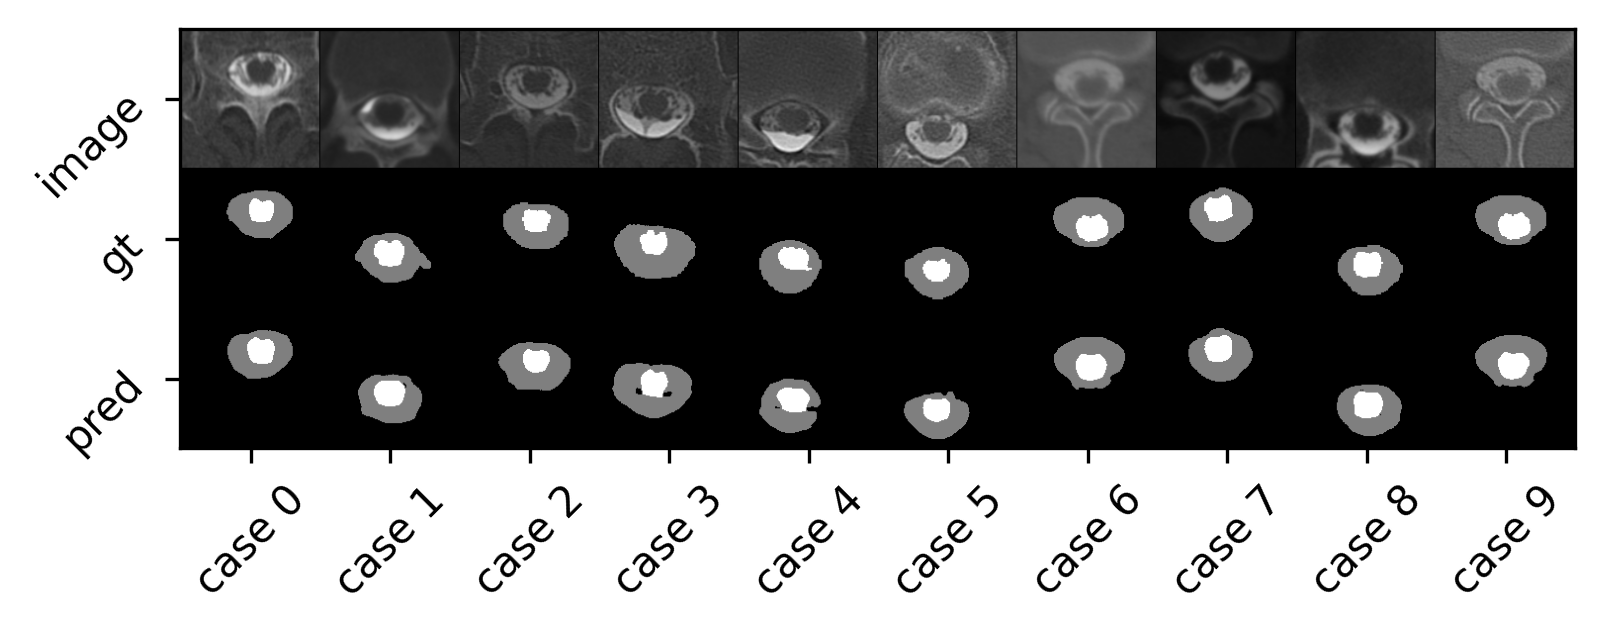

In [11]:
import torchvision

patients = results_raw[('Unnamed: 0_level_0','Unnamed: 0_level_1')].values
print("patients\n",patients)
# get images
n_case = 10
images = get_images(results_dir,patients[:n_case])
# show images
imshow(torchvision.utils.make_grid(images, nrow=3, padding=1), 
       n_case=n_case,
       filename=os.path.join(results_dir,'pred_mask vs gt_mask.png')
      )